In [1]:
import pandas as pd

# Ler o arquivo Iris
iris = pd.read_csv('/content/Iris.csv')

# Mostrar as primeiras linhas
iris.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


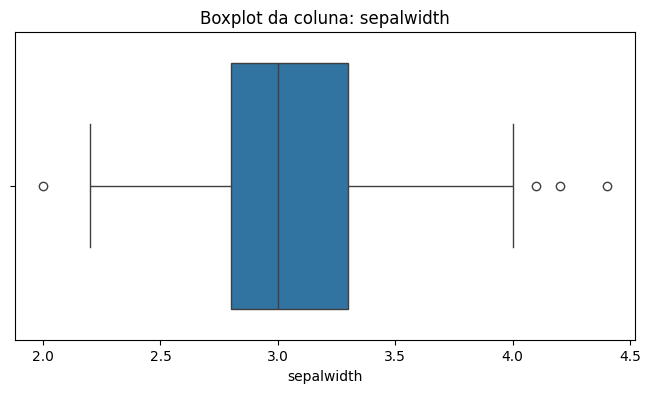

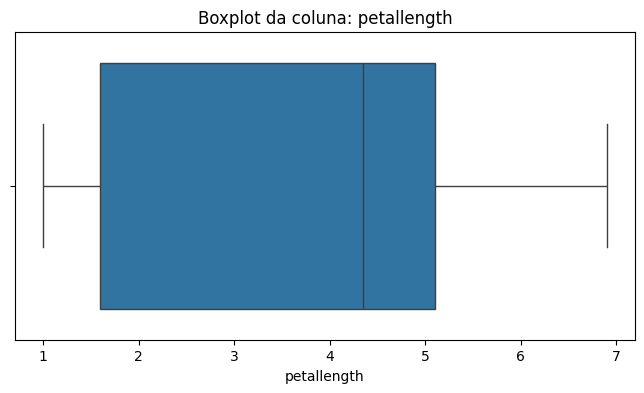

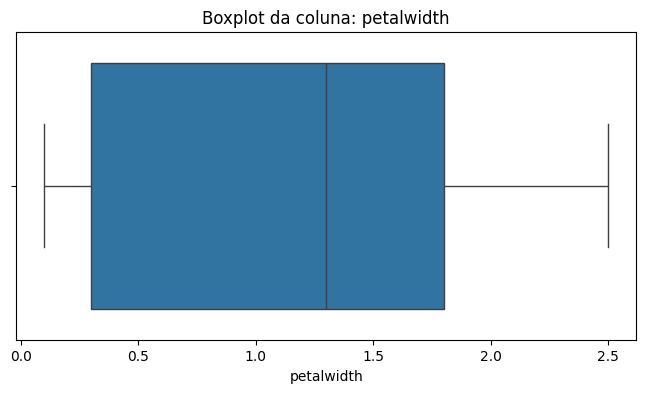

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar a coluna 'Id' e 'Species'
for coluna in iris.columns[1:-1]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=iris[coluna])
    plt.title(f'Boxplot da coluna: {coluna}')
    plt.show()


In [3]:
# Função para remover outliers usando o método IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Aplicar para todas as colunas numéricas
for coluna in iris.columns[1:-1]:  # pulando 'Id' e 'Species'
    iris = remover_outliers(iris, coluna)

# Verificar quantas linhas restaram
print("Total de registros após remoção:", iris.shape[0])


Total de registros após remoção: 146


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas as colunas numéricas
colunas_numericas = iris.columns[1:-1]  # Ignorar 'Id' e 'Species'

# Criar o normalizador
scaler = MinMaxScaler()

# Aplicar normalização
iris[colunas_numericas] = scaler.fit_transform(iris[colunas_numericas])

# Ver os dados normalizados
iris.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,0.722222,0.067797,0.041667,Iris-setosa
1,4.9,0.444444,0.067797,0.041667,Iris-setosa
2,4.7,0.555556,0.050847,0.041667,Iris-setosa
3,4.6,0.500000,0.084746,0.041667,Iris-setosa
4,5.0,0.777778,0.067797,0.041667,Iris-setosa


In [5]:
from sklearn.cluster import KMeans


In [7]:
print(iris.columns)



Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')


In [8]:
# Agora removendo apenas a coluna 'class'
X = iris.drop(['class'], axis=1)


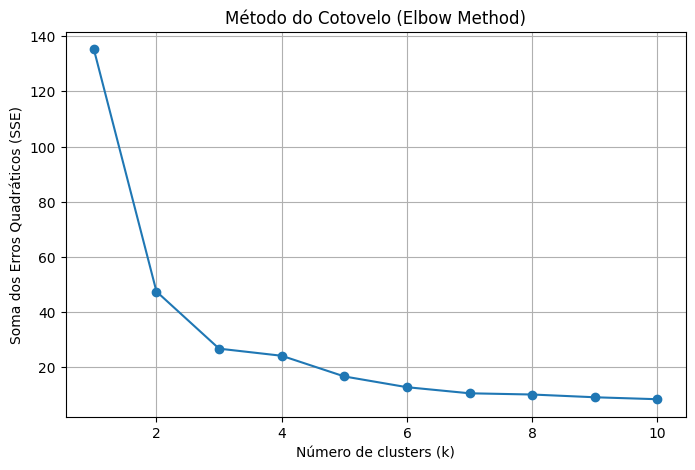

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para armazenar o SSE para cada k
sse = []

# Testar k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ é o SSE (erro quadrático total)

# Plotar o gráfico do Cotovelo
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo (Elbow Method)')
plt.grid(True)
plt.show()


In [10]:
# Rodar o KMeans com k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adicionar o resultado (cluster) no DataFrame
iris['cluster_kmeans'] = kmeans.labels_

# Ver as primeiras linhas
iris.head()


,sepallength,sepalwidth,petallength,petalwidth,class,cluster_kmeans
0,5.1,0.722222,0.067797,0.041667,Iris-setosa,2
1,4.9,0.444444,0.067797,0.041667,Iris-setosa,2
2,4.7,0.555556,0.050847,0.041667,Iris-setosa,2
3,4.6,0.500000,0.084746,0.041667,Iris-setosa,2
4,5.0,0.777778,0.067797,0.041667,Iris-setosa,2


In [11]:
from sklearn.metrics import silhouette_score

# Calcular o Índice de Silhouette
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Índice de Silhouette médio para k=3:", silhouette_avg)


Índice de Silhouette médio para k=3: 0.4806762152058286


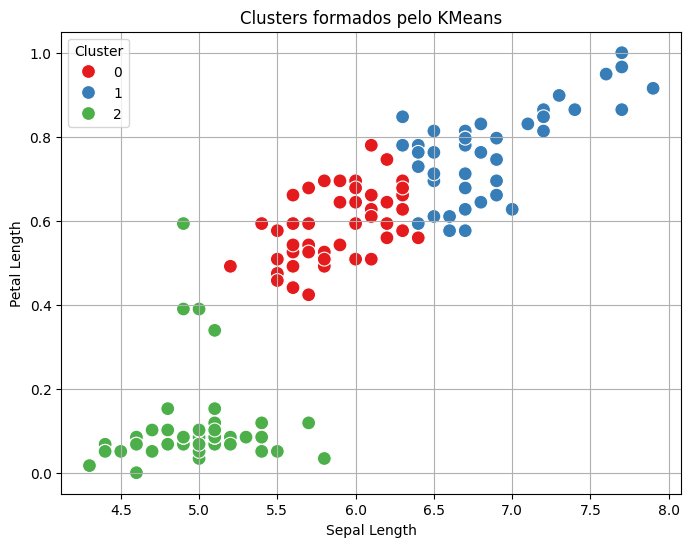

In [12]:
import seaborn as sns

# Escolher duas variáveis para o gráfico
plt.figure(figsize=(8,6))

# Scatter plot colorindo pelos clusters que o KMeans encontrou
sns.scatterplot(
    x=iris['sepallength'],
    y=iris['petallength'],
    hue=iris['cluster_kmeans'],
    palette='Set1',
    s=100
)

plt.title('Clusters formados pelo KMeans')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import davies_bouldin_score

# Calcular o Davies-Bouldin Index
dbi = davies_bouldin_score(X, kmeans.labels_)
print("Índice de Davies-Bouldin para k=3:", dbi)


Índice de Davies-Bouldin para k=3: 0.7090720585236564


In [14]:
from sklearn.cluster import DBSCAN

# Rodar o DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # parâmteros padrões iniciais
dbscan.fit(X)

# Adicionar o cluster do DBSCAN ao DataFrame
iris['cluster_dbscan'] = dbscan.labels_

# Mostrar os primeiros registros
iris[['cluster_kmeans', 'cluster_dbscan']].head()


,cluster_kmeans,cluster_dbscan
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [15]:
from sklearn.cluster import DBSCAN

# Tentar com eps maior (ex: 0.6)
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(X)

# Atualizar a coluna no DataFrame
iris['cluster_dbscan'] = dbscan.labels_

# Ver os primeiros valores
iris[['cluster_kmeans', 'cluster_dbscan']].head(10)


,cluster_kmeans,cluster_dbscan
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,2,0
9,2,0


In [16]:
import numpy as np

print("Grupos encontrados pelo DBSCAN:", np.unique(dbscan.labels_))


Grupos encontrados pelo DBSCAN: [0]


In [17]:
from sklearn.cluster import DBSCAN

# Tentar com eps maior (ex: 0.6)
dbscan = DBSCAN(eps=0.85, min_samples=4)
dbscan.fit(X)

# Atualizar a coluna no DataFrame
iris['cluster_dbscan'] = dbscan.labels_

# Ver os primeiros valores
iris[['cluster_kmeans', 'cluster_dbscan']].head(10)


,cluster_kmeans,cluster_dbscan
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,2,0
9,2,0


In [18]:
from sklearn.cluster import DBSCAN

# Tentar com eps maior (ex: 0.6)
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(X)

# Atualizar a coluna no DataFrame
iris['cluster_dbscan'] = dbscan.labels_

# Ver os primeiros valores
iris[['cluster_kmeans', 'cluster_dbscan']].head(10)


,cluster_kmeans,cluster_dbscan
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,2,0
9,2,0


In [19]:
from sklearn.cluster import DBSCAN

# Tentar com eps maior (ex: 0.6)
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(X)

# Atualizar a coluna no DataFrame
iris['cluster_dbscan'] = dbscan.labels_

# Ver os primeiros valores
iris[['cluster_kmeans', 'cluster_dbscan']].head(10)


,cluster_kmeans,cluster_dbscan
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,2,0
9,2,0


In [20]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=66baab8aa686d046549938f12e2449040a096b9b438dcddb17f1dd23fcac1025
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [21]:
from minisom import MiniSom

# Inicializar SOM: 3 neurônios (esperamos 3 grupos), 4 atributos (input_len)
som = MiniSom(x=3, y=1, input_len=X.shape[1], sigma=0.5, learning_rate=0.5, random_seed=42)

# Treinar o SOM com os dados normalizados
som.train(X.values, num_iteration=100)


In [22]:
# Criar lista para os rótulos
som_labels = []

# Para cada linha dos dados, atribuir o neurônio vencedor (somente a posição X)
for row in X.values:
    som_labels.append(som.winner(row)[0])  # pega o eixo X da grade SOM (0, 1 ou 2)

# Adicionar o resultado ao DataFrame
iris['cluster_som'] = som_labels

# Visualizar
iris[['class', 'cluster_kmeans', 'cluster_som']].head(10)


,class,cluster_kmeans,cluster_som
0,Iris-setosa,2,2
1,Iris-setosa,2,2
2,Iris-setosa,2,2
3,Iris-setosa,2,2
4,Iris-setosa,2,2
5,Iris-setosa,2,2
6,Iris-setosa,2,2
7,Iris-setosa,2,2
8,Iris-setosa,2,2
9,Iris-setosa,2,2


In [23]:
import numpy as np

print("Grupos encontrados pelo SOM:", np.unique(som_labels))


Grupos encontrados pelo SOM: [2]


In [24]:
# Tabela de comparação entre os grupos e as classes reais
pd.crosstab(iris['cluster_kmeans'], iris['class'], rownames=['Cluster KMeans'], colnames=['Classe Real'])


Classe Real,Iris-setosa,Iris-versicolor,Iris-virginica
Cluster KMeans,,,
0,0,36,16
1,0,10,33
2,47,3,1


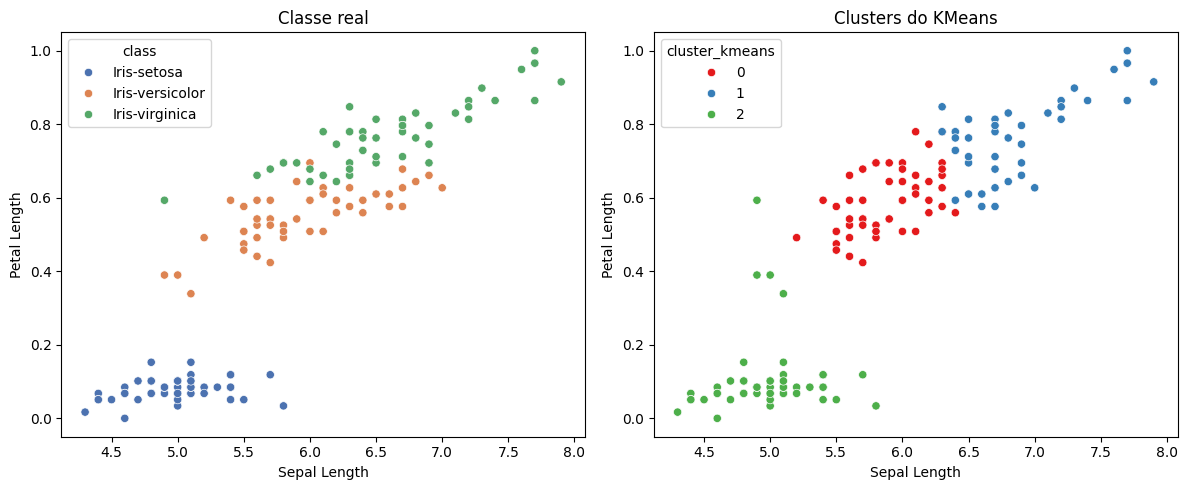

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Gráfico com a classe real
plt.subplot(1, 2, 1)
sns.scatterplot(x=iris['sepallength'], y=iris['petallength'], hue=iris['class'], palette='deep')
plt.title('Classe real')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Gráfico com os clusters do KMeans
plt.subplot(1, 2, 2)
sns.scatterplot(x=iris['sepallength'], y=iris['petallength'], hue=iris['cluster_kmeans'], palette='Set1')
plt.title('Clusters do KMeans')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.tight_layout()
plt.show()
